# Imports

In [230]:
import string
from unidecode import unidecode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Class implementation

In [231]:
class NaiveBayes():
    def __init__(self):
        self.A_ = None
        self.labels_ = None
        self.words_negative = None
        self.words_positive = None
        self.P_negative = None
        self.P_positive = None
        
    def fit(self, data, labels):
        self.A_ = np.zeros((np.max(data[:, 0]), np.max(data[:, 1])))
        for i in range(data.shape[0]):
            document = data[i, 0]
            word = data[i, 1]
            count = data[i, 2]
            self.A_[document-1, word-1] += count
        
        self.labels_ = labels
        
        self.P_negative = np.log(self.labels_[self.labels_ == 0].shape[0] / self.labels_.shape[0])
        self.P_positive = np.log(self.labels_[self.labels_ == 1].shape[0] / self.labels_.shape[0])
        
        n_V = np.sum(self.A_)
        n_positive = np.sum(clf.A_[clf.labels_ == 1])
        n_negative = np.sum(clf.A_[clf.labels_ == 0])
        
        self.words_negative = np.zeros((self.A_.shape[1]))
        self.words_positive = np.zeros((self.A_.shape[1]))
        
        for i in range(self.A_.shape[1]):
            self.words_negative[i] = np.log((np.sum(self.A_[self.labels_ == 0, i]) + 1) / (n_negative + n_V))
            self.words_positive[i] = np.log((np.sum(self.A_[self.labels_ == 1, i]) + 1) / (n_positive + n_V))
        
        
    def predict(self, data):
        positive = np.full(np.max(data[:, 0]), self.P_positive)
        negative = np.full(np.max(data[:, 0]), self.P_negative)
        for i in range(data.shape[0]):
            try:
                positive[data[i, 0]-1] += self.words_positive[data[i, 1]-1]
                negative[data[i, 0]-1] += self.words_negative[data[i, 1]-1]
            except IndexError:
                pass
        return positive > negative
            

# Original dataset

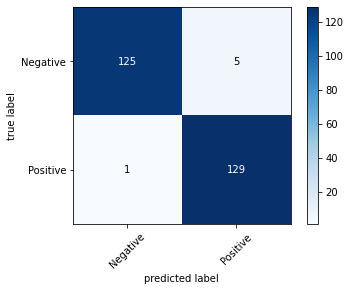

Accuracy: 0.9769230769230769


In [232]:
clf = NaiveBayes()
clf.fit(data=np.loadtxt("train-features.txt", dtype="int"), labels=np.loadtxt("train-labels.txt", dtype="int"))

true_classes = np.loadtxt("test-labels.txt")
predicted_classes = clf.predict(data=np.loadtxt("test-features.txt", dtype="int"))

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(true_classes, predicted_classes)
classes = ["Negative", "Positive"]

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = True,
                                   show_normed = False,
                                   colorbar = True)

plt.show()

from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(true_classes, predicted_classes)}")

# Train_size = 50

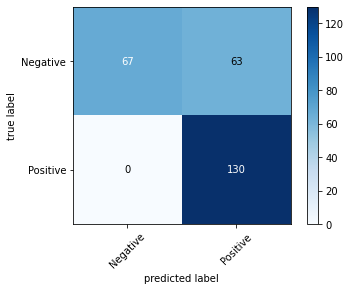

Accuracy: 0.7576923076923077


In [233]:
clf = NaiveBayes()
clf.fit(data=np.loadtxt("train-features-50.txt", dtype="int"), labels=np.loadtxt("train-labels-50.txt", dtype="int"))

true_classes = np.loadtxt("test-labels.txt")
predicted_classes = clf.predict(data=np.loadtxt("test-features.txt", dtype="int"))

cm = confusion_matrix(true_classes, predicted_classes)
classes = ["Negative", "Positive"]

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = True,
                                   show_normed = False,
                                   colorbar = True)

plt.show()

print(f"Accuracy: {accuracy_score(true_classes, predicted_classes)}")

# Train_size = 100

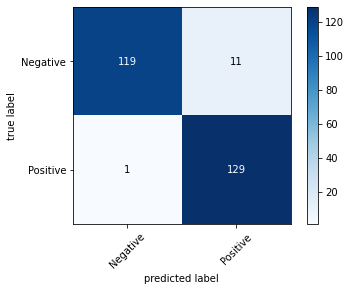

Accuracy: 0.9538461538461539


In [234]:
clf = NaiveBayes()
clf.fit(data=np.loadtxt("train-features-100.txt", dtype="int"), labels=np.loadtxt("train-labels-100.txt", dtype="int"))

true_classes = np.loadtxt("test-labels.txt")
predicted_classes = clf.predict(data=np.loadtxt("test-features.txt", dtype="int"))

cm = confusion_matrix(true_classes, predicted_classes)
classes = ["Negative", "Positive"]

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = True,
                                   show_normed = False,
                                   colorbar = True)

plt.show()

print(f"Accuracy: {accuracy_score(true_classes, predicted_classes)}")

# Train_size = 400

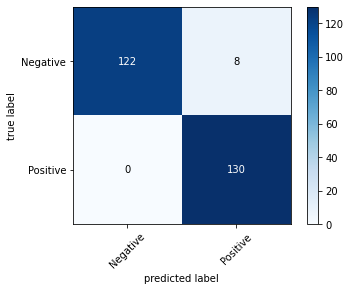

Accuracy: 0.9692307692307692


In [235]:
clf = NaiveBayes()
clf.fit(data=np.loadtxt("train-features-400.txt", dtype="int"), labels=np.loadtxt("train-labels-400.txt", dtype="int"))

true_classes = np.loadtxt("test-labels.txt")
predicted_classes = clf.predict(data=np.loadtxt("test-features.txt", dtype="int"))

cm = confusion_matrix(true_classes, predicted_classes)
classes = ["Negative", "Positive"]

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = True,
                                   show_normed = False,
                                   colorbar = True)

plt.show()

print(f"Accuracy: {accuracy_score(true_classes, predicted_classes)}")

# Proportions - 350 Negatives, 50 Positives

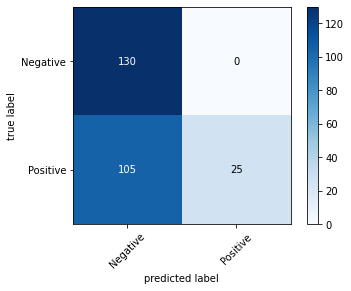

Accuracy: 0.5961538461538461


In [236]:
clf = NaiveBayes()
data = np.loadtxt("train-features.txt", dtype="int")
labels = np.loadtxt("train-labels.txt", dtype="int")

data = data[:40910, :]
labels = labels[:400]

clf.fit(data=data, labels=labels)

true_classes = np.loadtxt("test-labels.txt")
predicted_classes = clf.predict(data=np.loadtxt("test-features.txt", dtype="int"))

cm = confusion_matrix(true_classes, predicted_classes)
classes = ["Negative", "Positive"]

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = True,
                                   show_normed = False,
                                   colorbar = True)

plt.show()

print(f"Accuracy: {accuracy_score(true_classes, predicted_classes)}")